In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
sys.path.append("../../")
from src.util import noise_generator
from src.util import bath_correlation_function
from src.util import debye_spectral_density
from src.util import operators

### Constants

In [3]:
# Parameters for the spin-boson model
epsilon = 2.0
delta = -2.0
# Parameters for the Debye spectral density
beta_1 = 0.5
beta_2 = 50
T_1 = 1/beta_1
T_2 = 1/beta_2
gamma_1 = 0.25
gamma_2 = 5
eta = 0.5
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
L = sigma_z
h = operators.generate_spin_boson_hamiltonian(delta=delta, epsilon=epsilon)
# time window
duration = 30
# spectral density
J_1 = lambda w : eta*w*gamma_1/(w**2 + gamma_1**2)
J_2 = lambda w : eta*w*gamma_2/(w**2 + gamma_2**2)

### Computing the BCFs

In [4]:
def alpha(J, beta, tau, N, dw):
    integrand = lambda w : J(w) * (1./np.tanh(w*beta/2)*np.cos(w*tau) - 1j*np.sin(w*tau))
    result = (np.arange(N, dtype=float) + 0.5)*dw
    result = integrand(result)
    return np.sum(result)/np.pi*dw

In [5]:
def alpha_wiggle(J, beta, tau, N, dw):
    integrand = lambda w : J(w) * (np.tanh(w*beta/4)*np.cos(w*tau) - 1j*np.sin(w*tau))
    result = (np.arange(N, dtype=float) + 0.5)*dw
    result = integrand(result)
    return np.sum(result)/np.pi*dw

# Comparison - high temperature case

In [86]:
N = 100000
w_cut = 1000
dw = w_cut/N
taus = np.linspace(0, 10, 1000)

In [87]:
alphas = [alpha(J_1, beta_1, tau, N, dw) for tau in taus]
alphas_wiggle = [alpha_wiggle(J_1, beta_1, tau, N, dw) for tau in taus]

In [88]:
N_terms = 1000
g, w = debye_spectral_density.get_debye_coefficients(N_terms, T_1, gamma_1, eta)
g_alt, w_alt = debye_spectral_density.get_debye_coefficients_alternative(N_terms, T_1, gamma_1, eta)
N_terms_list = [1, 2, 10, 100, 1000]
alphas_approx = []
alphas_wiggle_approx = []
for N in N_terms_list:
    alphas_approx.append(bath_correlation_function.alpha(taus, g[:N], w[:N]))
    alphas_wiggle_approx.append(bath_correlation_function.alpha(taus, g_alt[:N], w_alt[:N]))

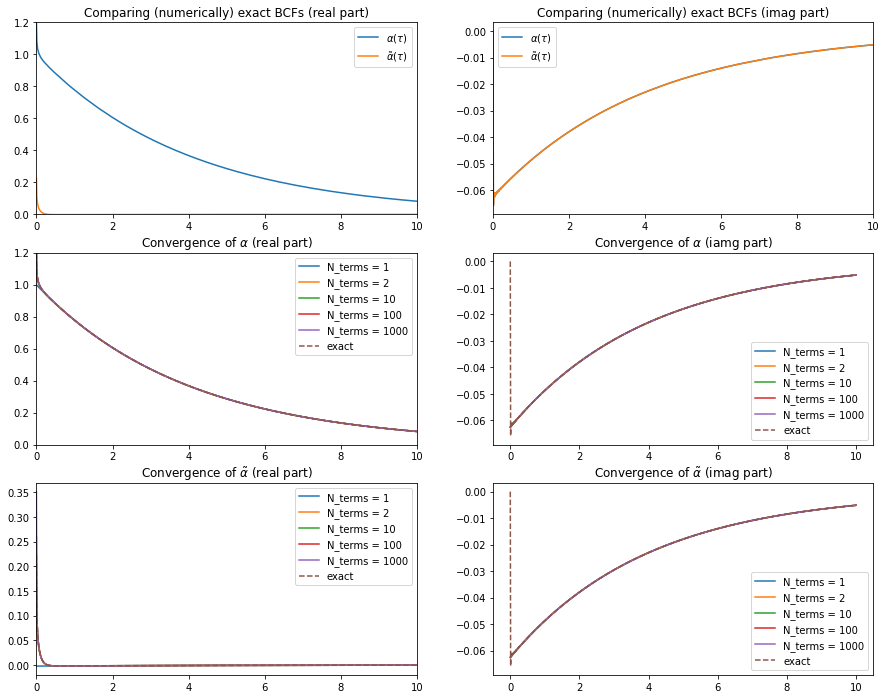

In [89]:
fig, axarray = plt.subplots(3, 2, figsize=(15, 12))
# Comparing (numerically) exact BCFs
axarray[0][0].set_title("Comparing (numerically) exact BCFs (real part)")
axarray[0][0].plot(taus, np.real(alphas), label=r"$\alpha(\tau)$")
axarray[0][0].plot(taus, np.real(alphas_wiggle), label=r"$\tilde{\alpha}(\tau)$")
axarray[0][0].legend()
axarray[0][0].set_xlim(0, 10)
axarray[0][0].set_ylim(0, 1.2)
axarray[0][1].set_title("Comparing (numerically) exact BCFs (imag part)")
axarray[0][1].plot(taus, np.imag(alphas), label=r"$\alpha(\tau)$")
axarray[0][1].plot(taus, np.imag(alphas_wiggle), label=r"$\tilde{\alpha}(\tau)$")
axarray[0][1].set_xlim(0, 10)
axarray[0][1].legend()
# Looking at convergence of default BCF
axarray[1][0].set_title(r"Convergence of $\alpha$ (real part)")
for i, N_terms in enumerate(N_terms_list):
    axarray[1][0].plot(taus, np.real(alphas_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[1][0].plot(taus, np.real(alphas), "--", label=r"exact")
axarray[1][0].legend()
axarray[1][0].set_xlim(0, 10)
axarray[1][0].set_ylim(0, 1.2)
axarray[1][1].set_title(r"Convergence of $\alpha$ (iamg part)")
for i, N_terms in enumerate(N_terms_list):
    axarray[1][1].plot(taus, np.imag(alphas_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[1][1].plot(taus, np.imag(alphas), "--", label=r"exact")
axarray[1][1].legend()
# Looking at convergence of alternative BCF
axarray[2][0].set_title(r"Convergence of $\tilde{\alpha}$ (real part)")
for i, N_terms in enumerate(N_terms_list):
    axarray[2][0].plot(taus, np.real(alphas_wiggle_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[2][0].plot(taus, np.real(alphas_wiggle), "--", label=r"exact")
axarray[2][0].legend()
axarray[2][0].set_xlim(0, 10)
axarray[2][1].set_title(r"Convergence of $\tilde{\alpha}$ (imag part)")
for i, N_terms in enumerate(N_terms_list):
    axarray[2][1].plot(taus, np.imag(alphas_wiggle_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[2][1].plot(taus, np.imag(alphas_wiggle), "--", label=r"exact")
axarray[2][1].legend()
plt.show()

### looking closer at the convergence of $\tilde{\alpha}$

In [90]:
N = 100000
w_cut = 1000
dw = w_cut/N
taus = np.linspace(0, 10, 1000)

In [91]:
alphas_wiggle = [alpha_wiggle(J_1, beta_1, tau, N, dw) for tau in taus]

In [92]:
N_terms = 1000
g_alt, w_alt = debye_spectral_density.get_debye_coefficients_alternative(N_terms, T_1, gamma_1, eta)
N_terms_list = [1, 2, 3, 4]
alphas_wiggle_approx = []
for N in N_terms_list:
    alphas_wiggle_approx.append(bath_correlation_function.alpha(taus, g_alt[:N], w_alt[:N]))

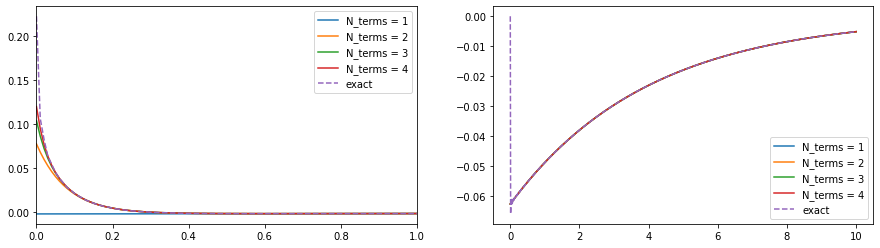

In [93]:
fig, axarray = plt.subplots(1, 2, figsize=(15, 4))
# Looking at convergence of alternative BCF
for i, N_terms in enumerate(N_terms_list):
    axarray[0].plot(taus, np.real(alphas_wiggle_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[0].plot(taus, np.real(alphas_wiggle), "--", label=r"exact")
axarray[0].legend()
axarray[0].set_xlim(0, 1)
for i, N_terms in enumerate(N_terms_list):
    axarray[1].plot(taus, np.imag(alphas_wiggle_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[1].plot(taus, np.imag(alphas_wiggle), "--", label=r"exact")
axarray[1].legend()
plt.show()

### Ordering the coefficients

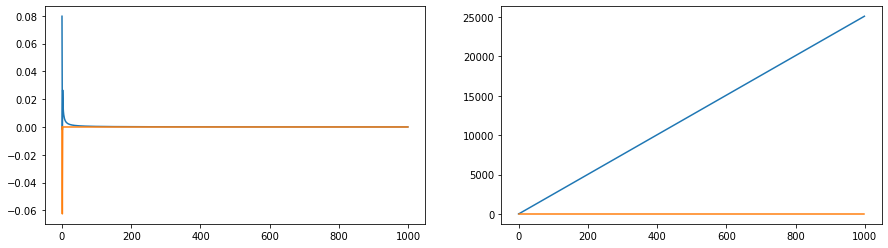

In [99]:
idx = np.flip(np.argsort(np.abs(g_alt)))
g_alt_ordered, w_alt_ordered = g_alt[idx], w_alt[idx]
fig, axarray = plt.subplots(1, 2, figsize=(15, 4))
axarray[0].plot(np.real(g_alt_ordered))
axarray[0].plot(np.imag(g_alt_ordered))
axarray[1].plot(np.real(w_alt_ordered))
axarray[1].plot(np.imag(w_alt_ordered))
plt.show()

In [95]:
alphas_wiggle_approx_ordered = []
for N in N_terms_list:
    alphas_wiggle_approx_ordered.append(bath_correlation_function.alpha(taus, g_alt_ordered[:N], w_alt_ordered[:N]))

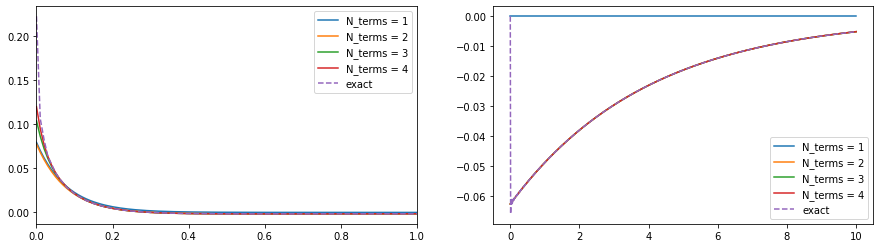

In [96]:
fig, axarray = plt.subplots(1, 2, figsize=(15, 4))
# Looking at convergence of alternative BCF
for i, N_terms in enumerate(N_terms_list):
    axarray[0].plot(taus, np.real(alphas_wiggle_approx_ordered[i]), label=r"N_terms = "+str(N_terms))
axarray[0].plot(taus, np.real(alphas_wiggle), "--", label=r"exact")
axarray[0].legend()
axarray[0].set_xlim(0, 1)
for i, N_terms in enumerate(N_terms_list):
    axarray[1].plot(taus, np.imag(alphas_wiggle_approx_ordered[i]), label=r"N_terms = "+str(N_terms))
axarray[1].plot(taus, np.imag(alphas_wiggle), "--", label=r"exact")
axarray[1].legend()
plt.show()

# Comparison - low temperature case

In [59]:
N = 100000
w_cut = 1000
dw = w_cut/N
taus = np.linspace(0, 10, 1000)

In [60]:
alphas = [alpha(J_2, beta_2, tau, N, dw) for tau in taus]
alphas_wiggle = [alpha_wiggle(J_2, beta_2, tau, N, dw) for tau in taus]

In [61]:
N_terms = 1000
g, w = debye_spectral_density.get_debye_coefficients(N_terms, T_2, gamma_2, eta)
g_alt, w_alt = debye_spectral_density.get_debye_coefficients_alternative(N_terms, T_2, gamma_2, eta)
N_terms_list = [1, 10, 100, 1000]
alphas_approx = []
alphas_wiggle_approx = []
for N in N_terms_list:
    alphas_approx.append(bath_correlation_function.alpha(taus, g[:N], w[:N]))
    alphas_wiggle_approx.append(bath_correlation_function.alpha(taus, g_alt[:N], w_alt[:N]))

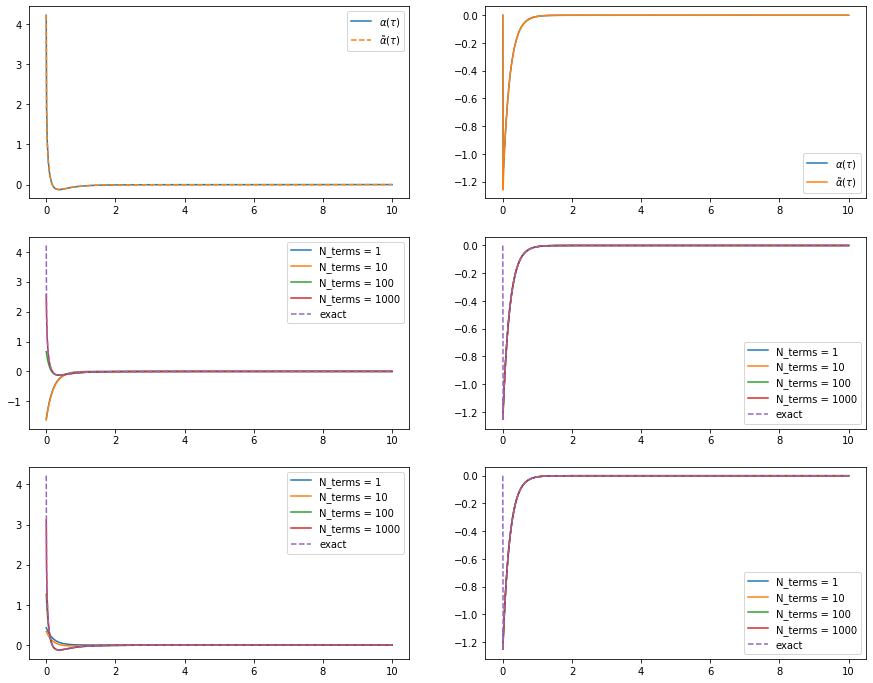

In [62]:
fig, axarray = plt.subplots(3, 2, figsize=(15, 12))
# Comparing (numerically) exact BCFs
axarray[0][0].plot(taus, np.real(alphas), label=r"$\alpha(\tau)$")
axarray[0][0].plot(taus, np.real(alphas_wiggle), "--", label=r"$\tilde{\alpha}(\tau)$")
axarray[0][0].legend()
axarray[0][1].plot(taus, np.imag(alphas), label=r"$\alpha(\tau)$")
axarray[0][1].plot(taus, np.imag(alphas_wiggle), label=r"$\tilde{\alpha}(\tau)$")
axarray[0][1].legend()
# Looking at convergence of default BCF
for i, N_terms in enumerate(N_terms_list):
    axarray[1][0].plot(taus, np.real(alphas_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[1][0].plot(taus, np.real(alphas), "--", label=r"exact")
axarray[1][0].legend()
for i, N_terms in enumerate(N_terms_list):
    axarray[1][1].plot(taus, np.imag(alphas_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[1][1].plot(taus, np.imag(alphas), "--", label=r"exact")
axarray[1][1].legend()
# Looking at convergence of alternative BCF
for i, N_terms in enumerate(N_terms_list):
    axarray[2][0].plot(taus, np.real(alphas_wiggle_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[2][0].plot(taus, np.real(alphas_wiggle), "--", label=r"exact")
axarray[2][0].legend()
for i, N_terms in enumerate(N_terms_list):
    axarray[2][1].plot(taus, np.imag(alphas_wiggle_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[2][1].plot(taus, np.imag(alphas_wiggle), "--", label=r"exact")
axarray[2][1].legend()
plt.show()

### looking closer at the convergence of $\tilde{\alpha}$

In [67]:
N = 100000
w_cut = 1000
dw = w_cut/N
taus = np.linspace(0, 10, 1000)

In [68]:
alphas_wiggle = [alpha_wiggle(J_2, beta_2, tau, N, dw) for tau in taus]

In [73]:
N_terms = 1000
g_alt, w_alt = debye_spectral_density.get_debye_coefficients_alternative(N_terms, T_2, gamma_2, eta)
N_terms_list = [4, 8, 16, 32, 64, 128]
alphas_wiggle_approx = []
for N in N_terms_list:
    alphas_wiggle_approx.append(bath_correlation_function.alpha(taus, g_alt[:N], w_alt[:N]))

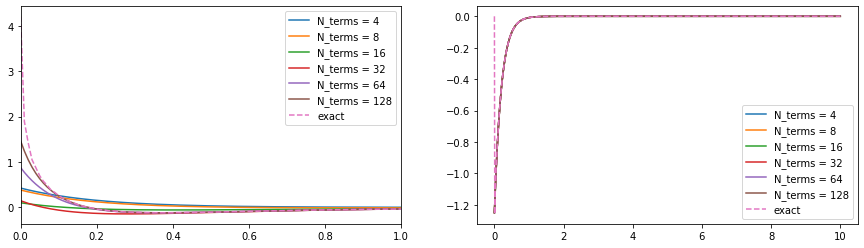

In [74]:
fig, axarray = plt.subplots(1, 2, figsize=(15, 4))
# Looking at convergence of alternative BCF
for i, N_terms in enumerate(N_terms_list):
    axarray[0].plot(taus, np.real(alphas_wiggle_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[0].plot(taus, np.real(alphas_wiggle), "--", label=r"exact")
axarray[0].legend()
axarray[0].set_xlim(0, 1)
for i, N_terms in enumerate(N_terms_list):
    axarray[1].plot(taus, np.imag(alphas_wiggle_approx[i]), label=r"N_terms = "+str(N_terms))
axarray[1].plot(taus, np.imag(alphas_wiggle), "--", label=r"exact")
axarray[1].legend()
plt.show()

# Looking at the expansion coefficients

In [7]:
N_terms = 1000
g, w = debye_spectral_density.get_debye_coefficients(N_terms, T_2, gamma_2, eta, use_alternative_expansion=False)
g_prime, w_prime = debye_spectral_density.get_debye_coefficients(N_terms, T_2, gamma_2, eta, use_alternative_expansion=True)

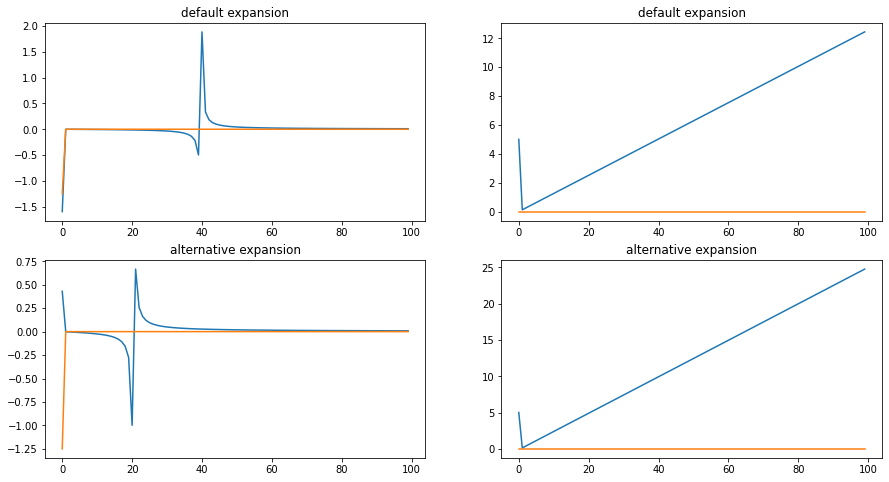

In [12]:
figure, axarray = plt.subplots(2, 2, figsize=(15, 8))
axarray[0][0].plot(np.real(g[:100]), label="real")
axarray[0][0].plot(np.imag(g[:100]), label="real")
axarray[0][0].set_title("default expansion")
axarray[0][1].plot(np.real(w[:100]), label="real")
axarray[0][1].plot(np.imag(w[:100]), label="real")
axarray[0][1].set_title("default expansion")
axarray[1][0].plot(np.real(g_prime[:100]), label="real")
axarray[1][0].plot(np.imag(g_prime[:100]), label="real")
axarray[1][0].set_title("alternative expansion")
axarray[1][1].plot(np.real(w_prime[:100]), label="real")
axarray[1][1].plot(np.imag(w_prime[:100]), label="real")
axarray[1][1].set_title("alternative expansion")
plt.show()